In [1]:
import torch                                                                  #"Θα κάνω κάτι με PINNs"
import torch.nn as nn                                                         #Νευρωνικά δίκτυα
import matplotlib.pyplot as plt


In [2]:
a=1
#ΝΔ
net = nn.Sequential(nn.Linear(1, 10), nn.Tanh(), nn.Linear(10, 1))            #Το Linear σημαίνει ξεκινάω με μία ευθεία ως χαζή 1η προσέγγιση, 10 νευρώνες
#Το Tanh() είναι η σιγμοειδής, εναλλακτικά Sigmoid(), ReLU()
optimizer=torch.optim.Adam(net.parameters(),lr=0.01)                          #Άλλαξε κάθε βάρος (default, δεν ξέρω αρκετά για να το αμφισβητήσω), lr: βήμα μάθησης
for epoch in range(1000):                                                     #Πλήθος επαναλήψεων
  x=torch.linspace(0, 2, 100).reshape(-1, 1).requires_grad_(True)
  y=net(x)                                                                    #Πρόβλεψη
  dy_dx=torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]#Παράγωγος
  loss_ode=torch.mean((dy_dx-a*y)**2)                                         #Συνάρτηση σφάλματος της ΣΔΕ
  y0=net(torch.tensor([[0.0]]))                                               #Φτιάξε μία "θέση" για να μπει η αρχική συνθήκη
  loss_bc=(y0-1)**2                                                           #Συνάρτηση σφάλματος των ΣΣ (εδώ ΑΣ y0=1)- "soft constrain"
  loss=loss_ode+loss_bc                                                       #Εδώ, w1=w2=1
  optimizer.zero_grad()                                                       #Μηδενισμός προηγούμενων κλίσεων
  loss.backward()                                                             #Υπολογισμός κλίσεων της loss ως προς όλες τις παραμέτρους (net) & αποθήκευση στο .grad (SOS)
  optimizer.step()                                                            #Ενημέρωση του βήματος, τυπικό
net.eval()

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

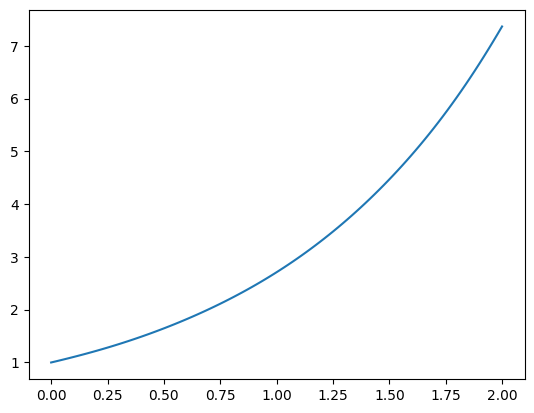

In [3]:
#Plot
x_test=torch.linspace(0, 2, 100).reshape(-1, 1)
x_np=x_test.numpy()                                                           #Το .numpy() το κάνει νορμάλ πίνακα
y_pred=net(x_test).detach().numpy()                                           #detach()= ξέχνα το ιστορικό
plt.plot(x_np,y_pred)